In [2]:
import pandas as pd
import numpy as np
import requests

## Data handling

In [5]:

# Importa csv
url = 'https://raw.githubusercontent.com/EduPekUfpr/MNUM-7124/main/Data/Demographics_Countries.csv'
df = pd.read_csv(url)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

In [19]:
# Contagem de nulos
df.isna().sum(axis=0)

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [28]:
# Fill NAs as MAR (mean)
for column in df.columns:
    if np.issubdtype(df[column], np.number):
        media = df[column].mean()
        df[column] = df[column].fillna(media) 

In [29]:
# Contagem de nulos
df.isna().sum(axis=0)

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

## Applications

In [116]:
# use of merge

# Compare all countries' population to it's minimum in the years.

df_max_pop = df[['Country', 'Population']].groupby('Country').min('Population').copy()
df_act_pop = df[['Country', 'Year', 'Population']].copy()

df_pop_evo = pd.merge(df_act_pop, df_max_pop, how='left', on='Country').copy()
df_pop_evo['Growth'] = (df_pop_evo['Population_x'] / df_pop_evo['Population_y'] - 1) 

df_pop_evo.drop(['Population_x', 'Population_y'], axis=1, inplace=True)
df_pop_evo.pivot_table(values='Growth', columns='Year', index='Country')


Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Afghanistan,0.139481,10.506928,84.260254,8.173271,92.557665,0.000000,9.044085,102.246697,9.587479,0.102922,10.183822,10.554004,13.340522,122.087410,0.270693,129.864064
Albania,12.235974,11.299558,0.193812,114.476369,110.165930,104.911935,1016.527032,9.104386,1001.146889,994.416185,98.055083,99.372322,0.000000,97.467188,97.236654,8.817409
Algeria,89.713463,918.017716,92.074994,93.354026,94.508378,967.362724,981.601670,0.000000,100.428758,102.170119,1049.664330,1070.083256,1091.792850,1114.271178,1136.808733,1158.865255
Angola,5.336013,64.417122,66.687341,6.023358,71.668051,74.313607,7.714439,10.546663,7.381419,85.857643,89.014564,92.286463,0.000000,9.014190,9.370996,9.731025
Antigua and Barbuda,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Viet Nam,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Yemen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Axes: >

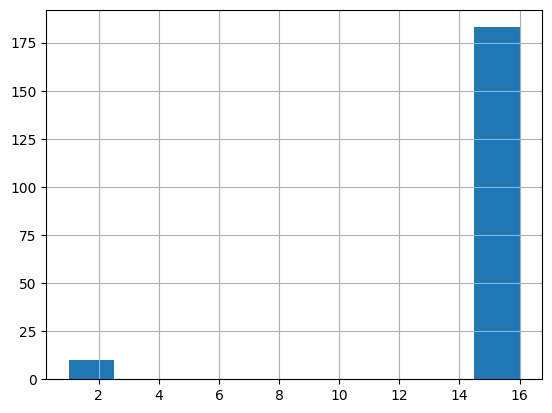

In [40]:
# Use of Crosstab:

# Count how many points of years for each country
pd.crosstab(df['Country'], df['Year'].astype(str)).sum(axis=1).hist()

In [43]:
# Use of pivot_table

# See all numeric varibales by country

numerical_columns = [_ for _ in df.columns if np.issubdtype(df[_], np.number)]
df.pivot_table(numerical_columns, columns='Country')

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
Adult_Mortality,2.690625e+02,45.062500,1.081875e+02,3.285625e+02,1.275000e+02,1.060000e+02,1.173750e+02,6.318750e+01,6.575000e+01,1.151875e+02,...,3.044375e+02,5.818750e+01,1.199375e+02,184.812500,137.875000,1.630000e+02,1.265625e+02,2.118125e+02,3.543125e+02,4.623750e+02
Alcohol,1.437500e-02,4.848750,6.689288e-01,5.669554e+00,7.740179e+00,7.756429e+00,3.758929e+00,9.808304e+00,1.175893e+01,1.217679e+00,...,3.646429e+00,8.330804e+00,6.074554e+00,1.795804,1.043929,7.243929e+00,3.182054e+00,3.320538e-01,2.387054e+00,4.489554e+00
BMI,1.551875e+01,49.068750,4.874375e+01,1.801875e+01,3.842500e+01,5.498125e+01,4.470625e+01,5.586250e+01,4.828750e+01,4.384375e+01,...,1.731875e+01,5.845000e+01,5.292500e+01,34.806250,44.256250,5.448750e+01,1.118750e+01,3.348750e+01,1.745000e+01,2.513750e+01
Diphtheria,5.231250e+01,98.062500,9.187500e+01,4.768750e+01,9.831250e+01,9.237500e+01,8.737500e+01,8.687500e+01,8.675000e+01,8.231250e+01,...,7.468750e+01,9.512500e+01,8.912500e+01,98.437500,59.062500,6.850000e+01,9.175000e+01,7.262500e+01,7.425000e+01,7.518750e+01
GDP,3.400154e+02,2119.726679,2.847853e+03,1.975143e+03,9.759306e+03,6.998575e+03,1.999986e+03,3.463757e+04,3.382748e+04,3.302948e+03,...,7.483158e+03,7.483158e+03,7.192585e+03,651.092359,2000.245518,7.483158e+03,7.483158e+03,7.483158e+03,8.118118e+02,4.109802e+02
HIV_AIDS,1.000000e-01,0.100000,1.000000e-01,2.368750e+00,1.250000e-01,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,1.000000e-01,...,7.275000e+00,1.000000e-01,1.000000e-01,0.206250,0.100000,1.000000e-01,1.437500e-01,1.000000e-01,1.193125e+01,2.326250e+01
Hepatitis_B,6.456250e+01,98.000000,7.873512e+01,7.491145e+01,9.718378e+01,8.124256e+01,8.756250e+01,9.262128e+01,8.106250e+01,6.193006e+01,...,7.443006e+01,8.137500e+01,9.431250e+01,93.805058,56.125000,6.625000e+01,8.630134e+01,5.568750e+01,7.329389e+01,7.056250e+01
Income_composition_of_resources,4.153750e-01,0.709875,6.948750e-01,4.583750e-01,4.886250e-01,7.941250e-01,6.983750e-01,9.181250e-01,8.623750e-01,7.026875e-01,...,6.275511e-01,6.275511e-01,7.656250e-01,0.603000,0.367500,7.268125e-01,6.270625e-01,4.755000e-01,4.984375e-01,4.391250e-01
Life_expectancy,5.819375e+01,75.156250,7.361875e+01,4.901875e+01,7.505625e+01,7.515625e+01,7.340000e+01,8.181250e+01,8.148125e+01,7.073125e+01,...,5.600625e+01,7.806250e+01,7.607500e+01,68.031250,71.387500,7.338750e+01,7.477500e+01,6.386250e+01,5.390625e+01,5.048750e+01
Measles,2.362250e+03,53.375000,1.943875e+03,3.561312e+03,0.000000e+00,2.000000e+00,2.742500e+02,1.039375e+02,7.725000e+01,5.981875e+02,...,3.348562e+03,1.306250e+02,0.000000e+00,208.437500,20.875000,1.650000e+02,4.232938e+03,2.761188e+03,6.563812e+03,9.230000e+02


In [100]:
# Use of resample

# Check final year alcohool time series

import datetime

# First, create a timeseries
ts = df['Alcohol'].squeeze()
ts.index = df['Year'].astype(str).apply(lambda x: datetime.datetime.strptime(x, '%Y'))

ts.resample('YE').mean() # Year end

Year
2000-12-31    4.570890
2001-12-31    4.555917
2002-12-31    4.660617
2003-12-31    4.690016
2004-12-31    4.752857
2005-12-31    4.843747
2006-12-31    4.915972
2007-12-31    5.011819
2008-12-31    5.004879
2009-12-31    4.887666
2010-12-31    4.941764
2011-12-31    4.870180
2012-12-31    4.140726
2013-12-31    3.931480
2014-12-31    3.278595
2015-12-31    4.625335
Freq: YE-DEC, Name: Alcohol, dtype: float64